# NYPD Shooting Prediction

[dataset link](https://www.kaggle.com/datasets/debjeetdas/nypd-shooting-incident-data)

## Data Preprocessing

Our data preprocessing consists of the following steps:

- Removed columns from the dataset
- Replaced the null values for UNKNOWN
- Reordered the columns
- Encoding categorical data
- Split data into Train and Test data

In [305]:
import pandas as pd

#### Removing Columns from dataset

In [306]:
# remove columns
dataset = pd.read_csv("./NYPD_Shooting_Incident_Data__Year_To_Date_.csv")
dataset = dataset.drop(columns=["PRECINCT","INCIDENT_KEY","OCCUR_DATE", "OCCUR_TIME", "JURISDICTION_CODE", "LOCATION_DESC", "X_COORD_CD", "Y_COORD_CD", "Longitude", "Latitude", "New Georeferenced Column", "Zip Codes", "Borough Boundaries", "City Council Districts", "Community Districts", "Police Precincts"])

# replace null values
dataset = dataset.replace({'(null)': None}) 
dataset = dataset.fillna("UNKNOWN") 

# check the null values
# dataset.isnull().sum()

# reorder dataset columns
new_columns = ["BORO", "LOC_OF_OCCUR_DESC", "LOC_CLASSFCTN_DESC","PERP_AGE_GROUP","PERP_SEX","PERP_RACE","VIC_AGE_GROUP","VIC_SEX","VIC_RACE","STATISTICAL_MURDER_FLAG"]
dataset = dataset[new_columns]




dataset

,BORO,LOC_OF_OCCUR_DESC,LOC_CLASSFCTN_DESC,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,STATISTICAL_MURDER_FLAG
0,BRONX,OUTSIDE,STREET,18-24,M,BLACK HISPANIC,18-24,F,BLACK,Y
1,BRONX,OUTSIDE,STREET,25-44,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,N
2,BRONX,OUTSIDE,VEHICLE,UNKNOWN,UNKNOWN,UNKNOWN,25-44,M,WHITE HISPANIC,N
3,QUEENS,OUTSIDE,HOUSING,UNKNOWN,UNKNOWN,UNKNOWN,18-24,M,BLACK,N
4,BROOKLYN,INSIDE,DWELLING,UNKNOWN,UNKNOWN,UNKNOWN,25-44,F,BLACK,N
...,...,...,...,...,...,...,...,...,...,...
1711,BRONX,OUTSIDE,STREET,UNKNOWN,UNKNOWN,UNKNOWN,18-24,M,BLACK,N
1712,MANHATTAN,OUTSIDE,STREET,25-44,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC,N
1713,MANHATTAN,OUTSIDE,STREET,18-24,M,BLACK,25-44,M,BLACK,N
1714,BRONX,INSIDE,HOUSING,25-44,M,BLACK,25-44,M,WHITE HISPANIC,N


#### Splitting data into two parts

In [307]:
X = dataset[new_columns[:-1]]


In [308]:
Y =  dataset[new_columns[-1]]
Y

0       Y
1       N
2       N
3       N
4       N
       ..
1711    N
1712    N
1713    N
1714    N
1715    N
Name: STATISTICAL_MURDER_FLAG, Length: 1716, dtype: object

#### Converting categorical data into numerical values

In [309]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [310]:
# Encode the categorical data
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,BORO,LOC_OF_OCCUR_DESC,LOC_CLASSFCTN_DESC,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
0,0,1,6,0,1,2,1,0,2
1,0,1,6,1,1,5,2,1,6
2,0,1,8,5,2,3,2,1,6
3,3,1,2,5,2,3,1,1,2
4,1,0,1,5,2,3,2,0,2
...,...,...,...,...,...,...,...,...,...
1711,0,1,6,5,2,3,1,1,2
1712,2,1,6,1,0,5,2,1,6
1713,2,1,6,0,1,1,2,1,2
1714,0,0,2,1,1,1,2,1,6


##### Encoded data values

In [312]:
# print the unique values of each column
col_names = X.columns.values.tolist()

for col in col_names:
    print(X[col].unique())

[0 3 1 2 4]
[1 0]
[6 8 2 1 3 0 7 5 4]
[0 1 5 4 2 3]
[1 2 0]
[2 5 3 1 0 4]
[1 2 3 5 4 0 6]
[0 1]
[2 6 3 1 5 4 0]


#### Splitting data into training and test sets

In [313]:
# Create the training data

(x_train, x_test, y_train, y_test) = train_test_split(X,Y,train_size=0.8, random_state=1)

In [314]:
# regressor = DecisionTreeClassifier(random_state=0)

regressor = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

##### Checking the Performance score

In [315]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

y_pred = regressor.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7848837209302325


In [316]:
score = regressor.score(x_test, y_test)
print("Accuracy: ", score)

Accuracy:  0.7848837209302325


## Decision Classification Tree

#### Creating the Decision Classification Tree

In [317]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

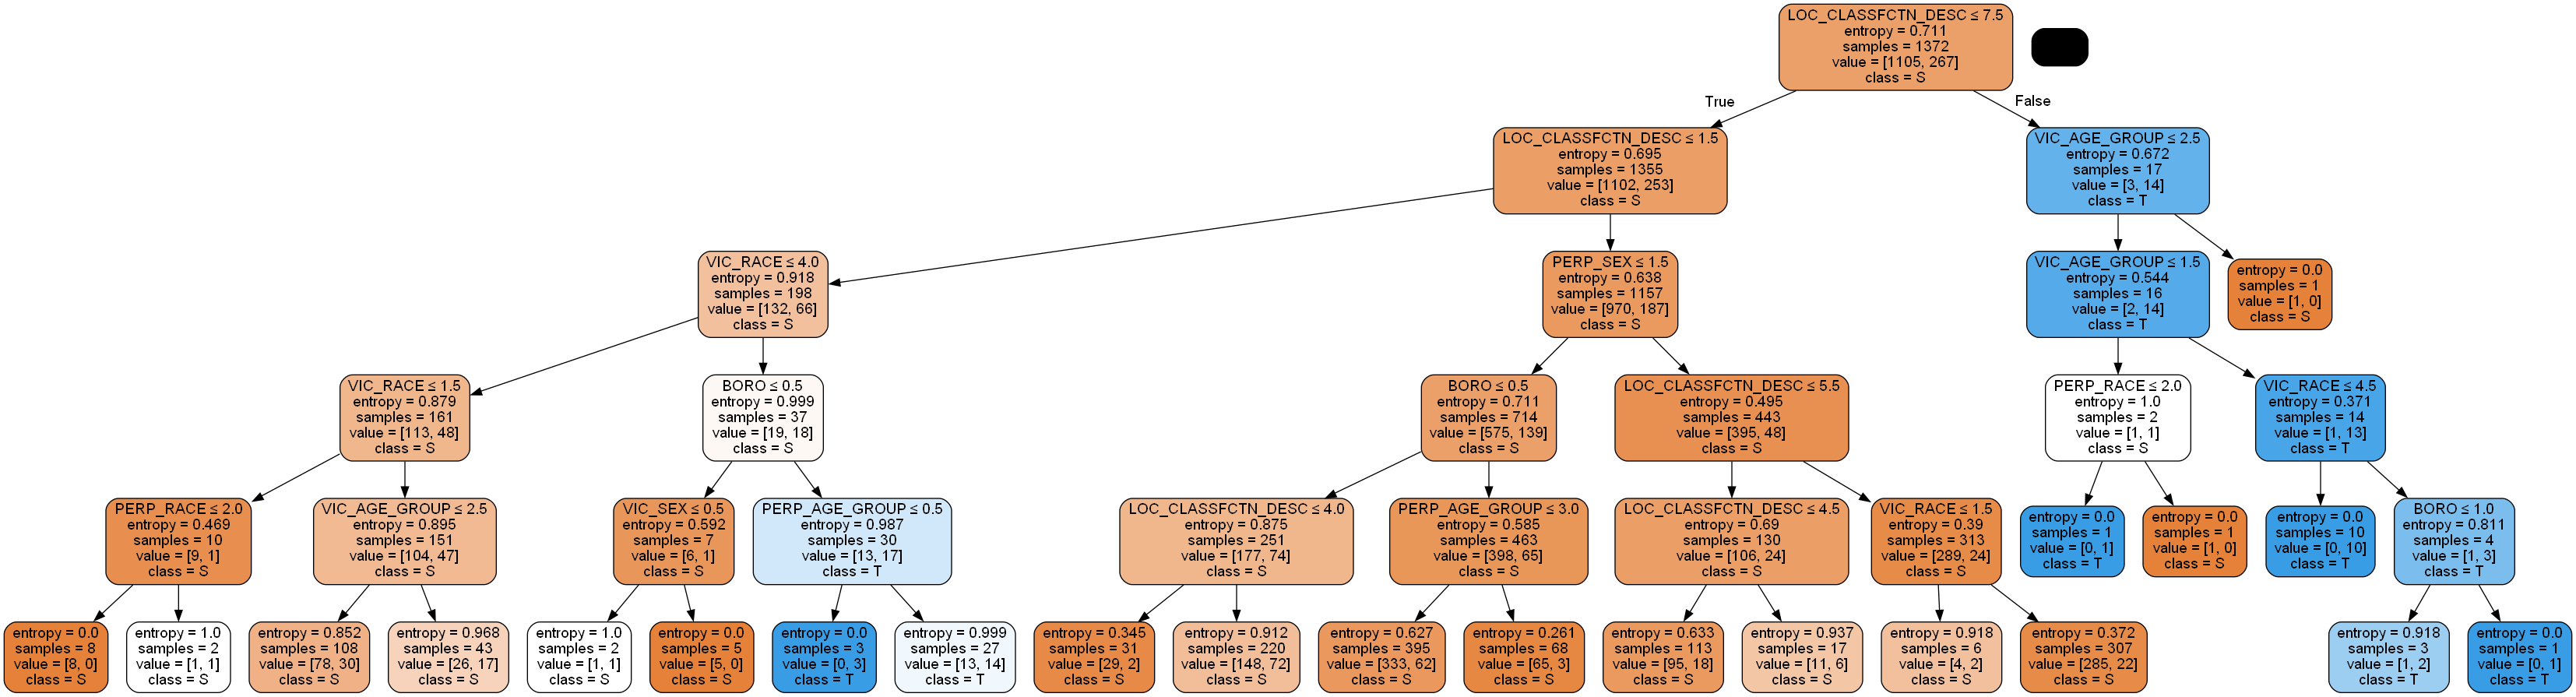

In [318]:
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters = True, feature_names = new_columns[:-1], class_names = new_columns[-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")
Image(graph.create_png())